## Aluno: Enzzo Comassetto dos Santos

## Objetivo:

### O trabalho é baseado nas câmeras publicas com acesso aberto , essas cameras são acessadas por qualquer pessoa e mostram imagens de pessoas em tempo real. A ideia é usar a biblioteca dlib para reconhecer os rostos das pessoas na imagem e borrar seus rostos, usando a esp32-cam para capturar as imagens. A proposta é manter o anonimato da pessoa na vida privada.

In [2]:
# Import required libraries
import cv2
import numpy as np
import dlib
import urllib.request
import imutils
import matplotlib.pyplot as plt

## Reconhecimento de rosto em fotos

### O get_frontal_face_detector retorna o detector facial pré-treinado HOG + Linear SVM incluído na biblioteca dlib. O detector facial HOG + Linear SVM da Dlib é rápido e eficiente, por isso foi escolhido para ser utilizado no projeto com a ESP32 CAM

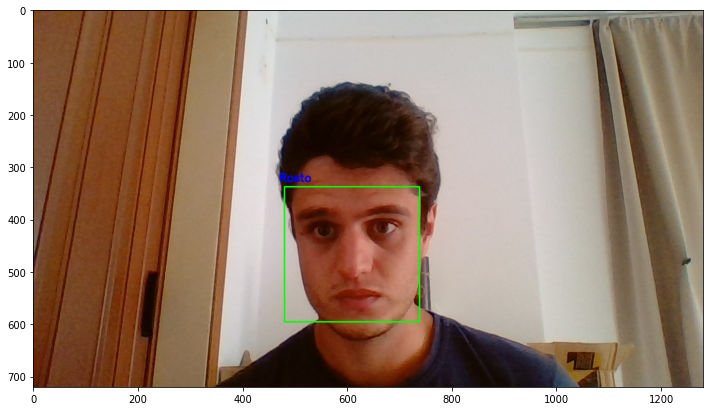

In [53]:
frame = cv2.cvtColor(cv2.imread("Rosto.jpg"), cv2.COLOR_BGR2RGB)
detector = dlib.get_frontal_face_detector()

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = detector(gray)

x, y = face.left(), face.top()
x1, y1 = face.right(), face.bottom()
image = cv2.rectangle(frame, (x, y), (x1, y1), (0, 255, 0), 2)

    
    # Display the box and faces
cv2.putText(frame, 'Rosto', (x-10, y-10),
cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

plt.figure(figsize=(12, 12))
plt.imshow(frame)

## Contando Varios Rostos

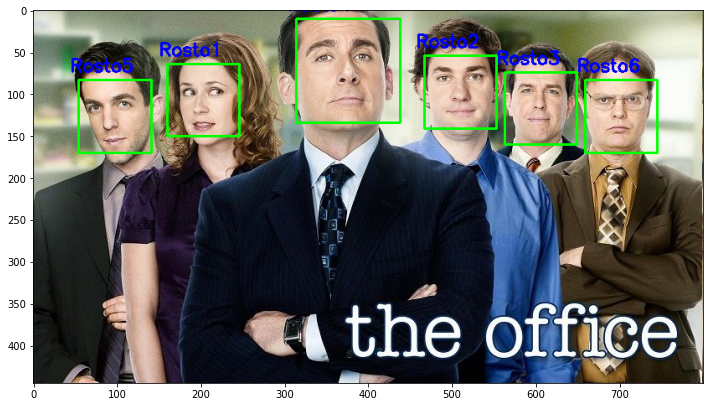

In [39]:
frame = cv2.cvtColor(cv2.imread("the-office-.jpeg"), cv2.COLOR_BGR2RGB)
detector = dlib.get_frontal_face_detector()

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = detector(gray)

i = 0
for face in faces:
    x, y = face.left(), face.top()
    x1, y1 = face.right(), face.bottom()
    image = cv2.rectangle(frame, (x, y), (x1, y1), (0, 255, 0), 2)
    #image[y:y+y1-y, x:x+x1-x] = cv2.medianBlur(image[y:y+y1-y, x:x+x1-x],25)
    # Increment iterator for each face in faces
    i = i+1
    
    # Display the box and faces
    cv2.putText(frame, 'Rosto'+str(i), (x-10, y-10),
    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

plt.figure(figsize=(12, 12))
plt.imshow(frame)

## Utilizando medianBlur para borrar rostos

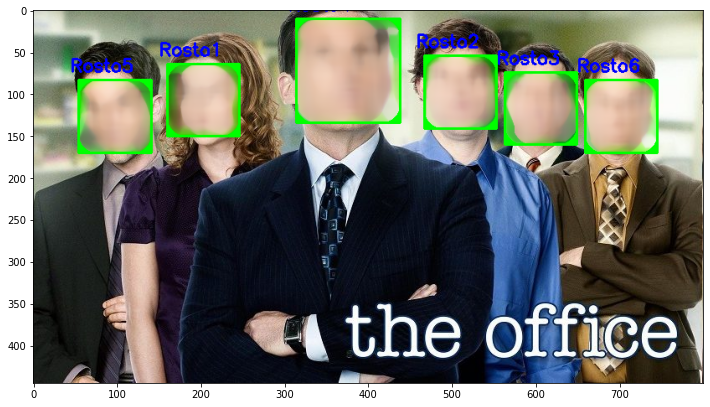

In [19]:
frame = cv2.cvtColor(cv2.imread("the-office-.jpeg"), cv2.COLOR_BGR2RGB)
detector = dlib.get_frontal_face_detector()

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = detector(gray)

i = 0
for face in faces:
    x, y = face.left(), face.top()
    x1, y1 = face.right(), face.bottom()
    image = cv2.rectangle(frame, (x, y), (x1, y1), (0, 255, 0), 2)
    image[y:y+y1-y, x:x+x1-x] = cv2.medianBlur(image[y:y+y1-y, x:x+x1-x],25)
    # Increment iterator for each face in faces
    i = i+1
    
    # Display the box and faces
    cv2.putText(frame, 'Rosto'+str(i), (x-10, y-10),
    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

plt.figure(figsize=(12, 12))
plt.imshow(frame)

## Reconhecendo e numerando rostos com a ESP 32 Cam

[(100, 19) (204, 123)] 1
[(79, 10) (203, 134)] 1
[(89, 8) (192, 112)] 1
[(79, 10) (203, 134)] 1
[(79, 10) (203, 134)] 1
[(79, 10) (203, 134)] 1
[(79, 10) (203, 134)] 1
[(79, 10) (203, 134)] 1
[(89, 8) (192, 112)] 1
[(100, 19) (204, 123)] 1
[(100, 19) (204, 123)] 1
[(112, 35) (198, 121)] 1
[(112, 31) (215, 135)] 1
[(112, 31) (215, 135)] 1
[(121, 35) (208, 121)] 1
[(121, 35) (208, 121)] 1
[(121, 45) (208, 131)] 1
[(121, 45) (208, 131)] 1
[(121, 45) (208, 131)] 1
[(133, 53) (205, 125)] 1
[(133, 53) (205, 125)] 1
[(133, 53) (205, 125)] 1
[(133, 53) (205, 125)] 1
[(133, 53) (205, 125)] 1
[(133, 53) (205, 125)] 1
[(133, 53) (205, 125)] 1
[(133, 53) (205, 125)] 1
[(133, 53) (205, 125)] 1
[(133, 53) (205, 125)] 1
[(133, 53) (205, 125)] 1
[(133, 53) (205, 125)] 1
[(133, 53) (205, 125)] 1
[(133, 53) (205, 125)] 1
[(133, 53) (205, 125)] 1
[(133, 53) (205, 125)] 1
[(133, 53) (205, 125)] 1
[(133, 53) (205, 125)] 1
[(133, 53) (205, 125)] 1
[(133, 53) (205, 125)] 1
[(133, 53) (205, 125)] 1
[(133, 53)

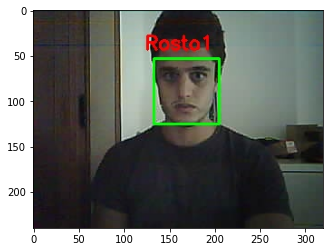

In [31]:
cap='http://192.168.4.1/capture' # para usar ESP32-CAM
#cap = cv2.VideoCapture(0)
detector = dlib.get_frontal_face_detector()

while True:

# Captura frame a frame
    img_resp=urllib.request.urlopen(cap)
    imgnp=np.array(bytearray(img_resp.read()),dtype=np.uint8)
    frame=cv2.imdecode(imgnp,-1)
    #ret, frame = cap.read()
    #frame = cv2.flip(frame, 1)

    # RGB para escala de cinza
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    # I conta as faces
    i = 0
    for face in faces:

        # Pega as coordenadas do rosto e borra o rosto
        x, y = face.left(), face.top()
        x1, y1 = face.right(), face.bottom()
        image = cv2.rectangle(frame, (x, y), (x1, y1), (0, 255, 0), 2)

        #Incrementa ao reconhecer cada rosto
        i = i+1

        # Display the box and faces
        cv2.putText(frame, 'Rosto'+str(i), (x-10, y-10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        print(face, i)


    # Display the resulting frame
    cv2.imshow('ESP32 - Cam', frame)

    # Fecha a janela e grava o ultimo frame 
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


# Release the capture and destroy the windows
cv2.imwrite('Rosto_ESP32.jpg', frame)
frame = cv2.cvtColor(cv2.imread("Rosto_ESP32.jpg"), cv2.COLOR_BGR2RGB);
plt.imshow(frame)
#cap.release()
cv2.destroyAllWindows()


## Reconhecendo e aplicando o medianBlur com a ESP 32 Cam

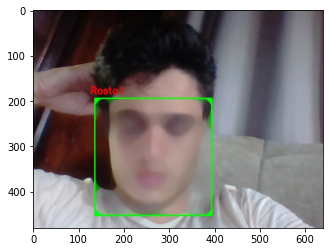

In [3]:
#cap='http://192.168.4.1/capture' # para usar ESP32-CAM
cap = cv2.VideoCapture(0)

detector = dlib.get_frontal_face_detector()

while True:

# Captura frame a frame
    #img_resp=urllib.request.urlopen(cap)
    #imgnp=np.array(bytearray(img_resp.read()),dtype=np.uint8)
    #frame=cv2.imdecode(imgnp,-1)
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)

    # RGB para escala de cinza
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    # I conta as faces
    i = 0
    for face in faces:

        # Pega as coordenadas do rosto e borra o rosto
        x, y = face.left(), face.top()
        x1, y1 = face.right(), face.bottom()
        image = cv2.rectangle(frame, (x, y), (x1, y1), (0, 255, 0), 2)
        image[y:y+y1-y, x:x+x1-x] = cv2.medianBlur(image[y:y+y1-y, x:x+x1-x],25) #Borra o rosto dentro do quadrado

        #Incrementa ao reconhecer cada rosto
        i = i+1

        # Display the box and faces
        cv2.putText(frame, 'Rosto'+str(i), (x-10, y-10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)


    # Display the resulting frame
    cv2.imshow('frame', frame)

    # Fecha a janela e grava o ultimo frame 
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


# Release the capture and destroy the windows
cv2.imwrite('Rosto_Blur_ESP32.jpg', frame)
frame = cv2.cvtColor(cv2.imread("Rosto_Blur_ESP32.jpg"), cv2.COLOR_BGR2RGB);
plt.imshow(frame)
cap.release()
cv2.destroyAllWindows()


## Reconhecendo individuos (corpo inteiro) com a biblioteca dlib + imutils

Pessoas Reconhecidas:  5


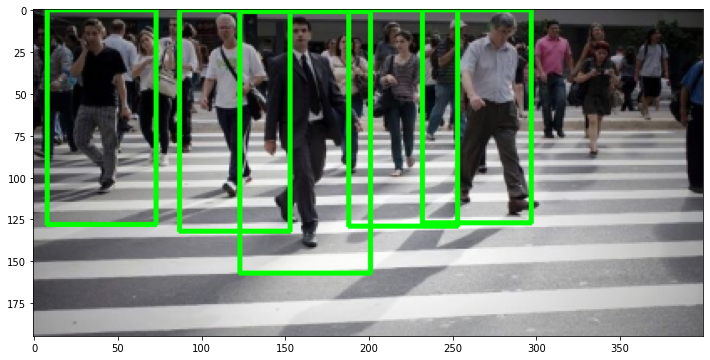

In [84]:
hog = cv2.HOGDescriptor()
detector = hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector()) #detector de pessoas

image= cv2.cvtColor(cv2.imread("pedestres.jpg"), cv2.COLOR_BGR2RGB)

image = imutils.resize(image, width=min(400, image.shape[1])) #resize para melhorar a detecção
   
# detectando as regioões com pedestres
(rects, weights) = hog.detectMultiScale(image, winStride=(3, 3), padding=(3, 3), scale=1.05)
print('Pessoas Reconhecidas: ', len(rects))
#Desenhando as regiõs na imagem
for (x, y, w, h) in regions:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
#Saida
plt.figure(figsize=(12, 12))
plt.imshow(image)



### Efeitos blur nos pedestres

Pessoas Reconhecidas:  5


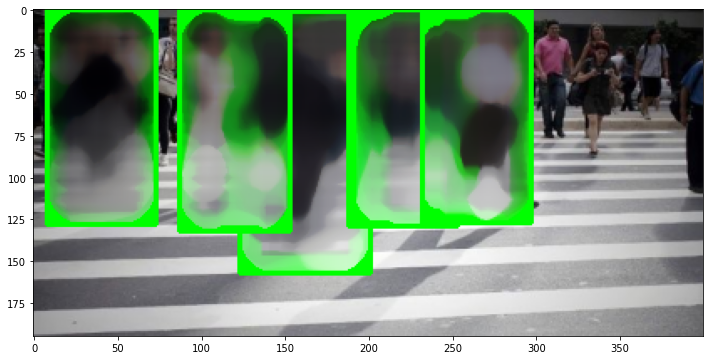

In [86]:
hog = cv2.HOGDescriptor()
detector = hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector()) #detector de pessoas

image= cv2.cvtColor(cv2.imread("pedestres.jpg"), cv2.COLOR_BGR2RGB)

image = imutils.resize(image, width=min(400, image.shape[1])) #resize para melhorar a detecção
   
# detectando as regioões com pedestres
(rects, weights) = hog.detectMultiScale(image, winStride=(3, 3), padding=(3, 3), scale=1.05)
print('Pessoas Reconhecidas: ', len(rects))
#Desenhando as regiõs na imagem
for (x, y, w, h) in regions:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    image[y:y+h, x:x+w] = cv2.medianBlur(image[y:y+h, x:x+w],25) #Borra o rosto dentro do quadrado
    
#Saida
plt.figure(figsize=(12, 12))
plt.imshow(image)

## Reconhecimento de individuos com a ESP Cam 32 e aplicando efeito blur

In [92]:
hog = cv2.HOGDescriptor()
detector = hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector()) #detector de pessoas

cap='http://192.168.4.1/capture' # para usar ESP32-CAM

while True:

 # Reading the video stream
    img_resp=urllib.request.urlopen(cap)
    imgnp=np.array(bytearray(img_resp.read()),dtype=np.uint8)
    image=cv2.imdecode(imgnp,-1)
    
    if 1:
        image = imutils.resize(image, width=min(400, image.shape[1]))
   
        # detectando as regioões com pedestres
        (regions, _) = hog.detectMultiScale(image, winStride=(4, 4), padding=(4, 4), scale=1.05)
   
        #Desenhando as regiõs na imagem
        for (x, y, w, h) in regions:
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
            image[y:y+h, x:x+w] = cv2.medianBlur(image[y:y+h, x:x+w],25) #Borra o rosto dentro do quadrado
   
        # Showing the output Image
        cv2.imshow("Image", image)
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    else:
        break


# Release the capture and destroy the windows
cv2.destroyAllWindows()

## Conclusão

### Os resultados apresentados na detecção de rostos foram satisfatórios, como previsto o detector HOG consegue captar em tempo real, sendo bem preciso para distancias menores. O detecotor de pessoas porém não obteve resultados tão confiaveis, sendo q uma melhora deste poderia ser mais util para câmeras de acesso aberto.